In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
from test_generator import Line, generate_image, apply_general_noise
from line_utils import draw_r_phi
from math import pi

In [23]:
def naive_hough(test_edges):
    lines = cv.HoughLinesWithAccumulator(test_edges, rho=1, theta=0.01, threshold=1)
    h, w = len(test_edges), len(test_edges[0])
    x, y, values = [], [], []
    for i in lines:
        x.append(i[0][0])
        y.append(i[0][1])
        values.append(i[0][2] / (h + w))

    plt.figure(figsize=(25, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(test_edges, cmap="gray")

    plt.subplot(1, 3, 2)
    ax = plt.gca()
    hist, xedges, yedges = np.histogram2d(x, y, bins=100, weights=values)

    X, Y = np.meshgrid(xedges, yedges)

   
    plt.scatter(x, y, marker='o', c=values, alpha=[max(v, 1) for v in values], cmap=plt.cm.binary, vmin=-0.1, vmax=0.5)
    plt.scatter(x, y, marker='o', c=values, alpha=[0 if v < 0.2 else 1 for v in values], cmap=plt.cm.YlOrRd)
    plt.xlim((-(h + w) / 2, (h + w) / 2))
    #plt.xlim((35, 85))

    plt.grid()
    plt.subplot(1, 3, 3)

    print(lines)
    plt.imshow(test_edges, cmap="gray")
    print(plt.gca().get_xlim())
    for i in lines:
        if i[0][-1] / (h + w) <= 0.2:
            break
        draw_r_phi((i[0][0], pi / 2 - i[0][1]))
    plt.show()

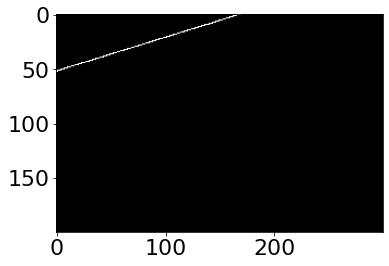

In [24]:
test_images = [
    generate_image([Line(50, 0.3, 1)]),
    generate_image([Line(50, 0.3, 1), Line(120, 0.81, 1), Line(130, 1.5, 1)]),
    generate_image([Line(50, 0.3, 1), Line(120, 0.81, 1), Line(130, 1.5, 1)]),
    generate_image([Line(60, 0.3, 2)], h=120, w=150),
    generate_image([Line(60, 0.3, 1), Line(60, 0.35, 1)], h=120, w=150),

]
apply_general_noise(test_images[2], lambda: np.random.normal(180, 40, 2), 0.22)
#plt.imshow(test_im / 255, cmap='gray')
test_edges = [255 - test_images[i] for i in range(len(test_images))]#cv.Canny(test_img, 10, 20)
plt.show()
plt.imshow(test_edges[0], cmap='gray')

[[[ 49.          1.27      115.       ]]

 [[ 50.          1.26      103.       ]]

 [[ 51.          1.25       68.       ]]

 ...

 [[-43.          3.1299999   2.       ]]

 [[-36.          3.1299999   2.       ]]

 [[-33.          3.1299999   2.       ]]]
(-0.5, 299.5)
0.9551008499335829 0.29628089114242173 -49.0
0.9520903386740184 0.30581691745813033 -50.0


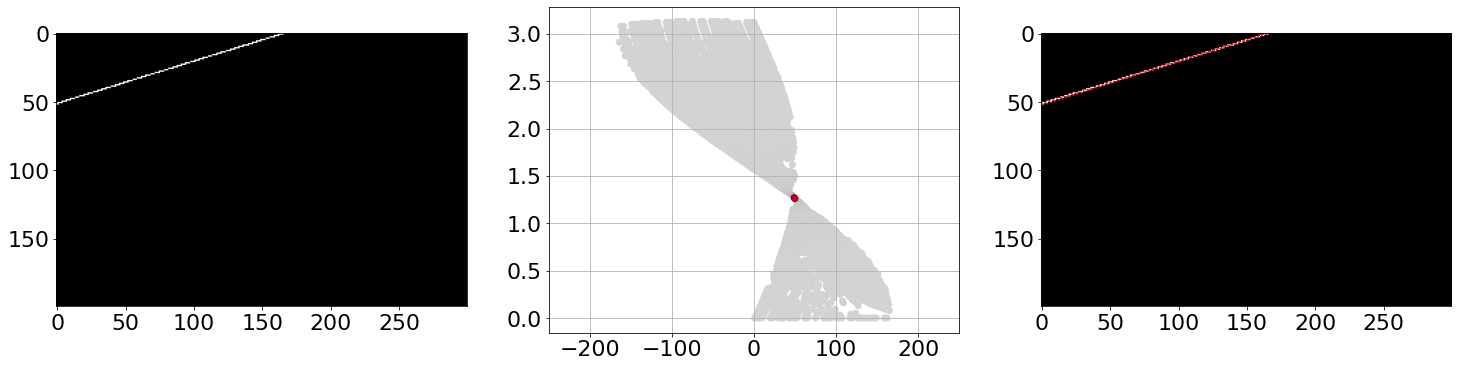

[[[ 1.19e+02  7.60e-01  1.93e+02]]

 [[ 1.29e+02  7.00e-02  1.27e+02]]

 [[ 4.90e+01  1.27e+00  1.17e+02]]

 ...

 [[-1.64e+02  3.02e+00  2.00e+00]]

 [[-1.62e+02  3.02e+00  2.00e+00]]

 [[-1.65e+02  3.07e+00  2.00e+00]]]
(-0.5, 299.5)
0.6889214381979765 0.724836017310972 -119.0
0.0699428476348262 0.9975510002324349 -129.0
0.9551008499335829 0.29628089114242173 -49.0
0.0799146921867524 0.996801706445518 -130.0
0.9520903386740184 0.30581691745813033 -50.0


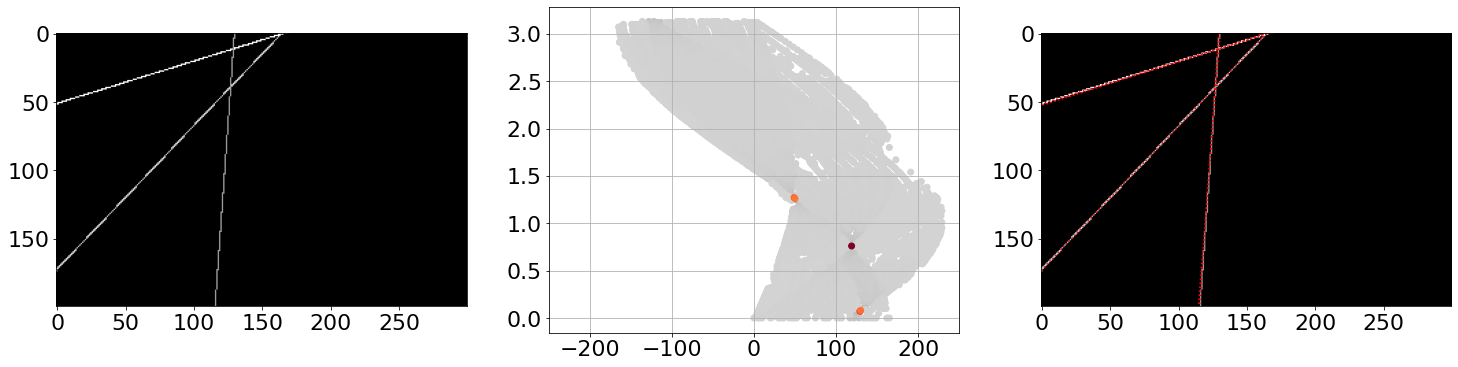

[[[ 1.19e+02  7.60e-01  1.93e+02]]

 [[ 1.29e+02  7.00e-02  1.33e+02]]

 [[ 1.30e+02  8.00e-02  1.24e+02]]

 ...

 [[-2.82e+02  3.06e+00  2.00e+00]]

 [[-2.72e+02  3.06e+00  2.00e+00]]

 [[-2.75e+02  3.12e+00  2.00e+00]]]
(-0.5, 299.5)
0.6889214381979765 0.724836017310972 -119.0
0.0699428476348262 0.9975510002324349 -129.0
0.0799146921867524 0.996801706445518 -130.0
0.9551008499335829 0.29628089114242173 -49.0
0.9871000956697918 0.16010434450285152 -198.0
0.9520903386740184 0.30581691745813033 -50.0
0.9998156167824503 -0.01920240708682996 -183.0
0.9987897432359972 -0.04918382667677113 -173.0
0.9837008122390312 0.17981299174495244 -193.0
0.9960239928900828 -0.08908538369057163 -166.0
0.9802244765624749 -0.19788879591281094 -134.0
0.9927129824185562 0.12050284037173244 -190.0
0.993868354448599 0.11056986038534135 -195.0
0.9991679441046071 0.04078503982801519 -189.0
0.9886517564047411 0.1502255123400163 -197.0
0.9901045529764908 0.14033165777978734 -200.0
0.9974949866040544 0.070737201667

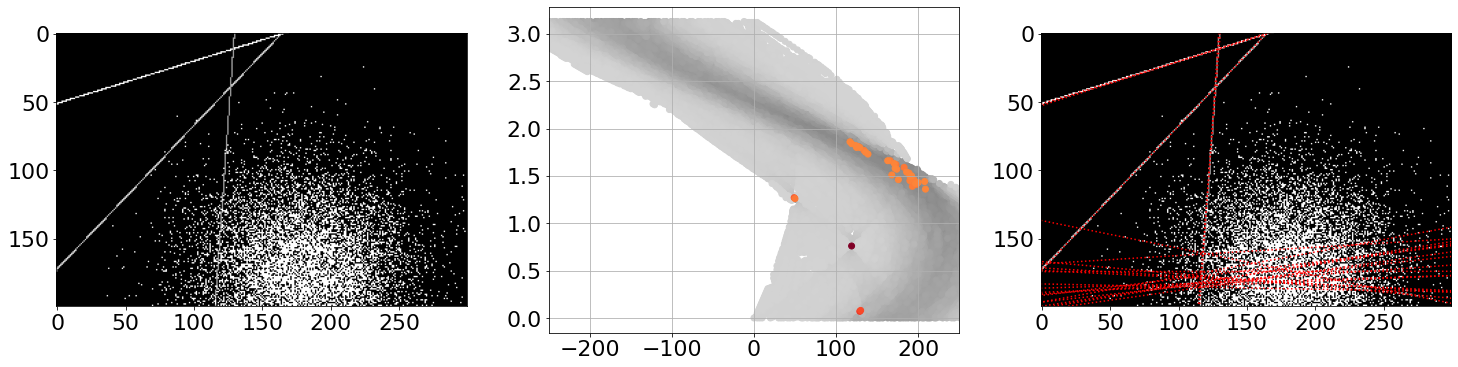

[[[  59.      1.27  150.  ]]

 [[  60.      1.26  114.  ]]

 [[  62.      1.24   72.  ]]

 ...

 [[ -88.      2.71    2.  ]]

 [[-122.      2.72    2.  ]]

 [[ -94.      2.73    2.  ]]]
(-0.5, 149.5)
0.9551008499335829 0.29628089114242173 -59.0
0.9520903386740184 0.30581691745813033 -60.0
0.9457840025470378 0.3247962754190771 -62.0


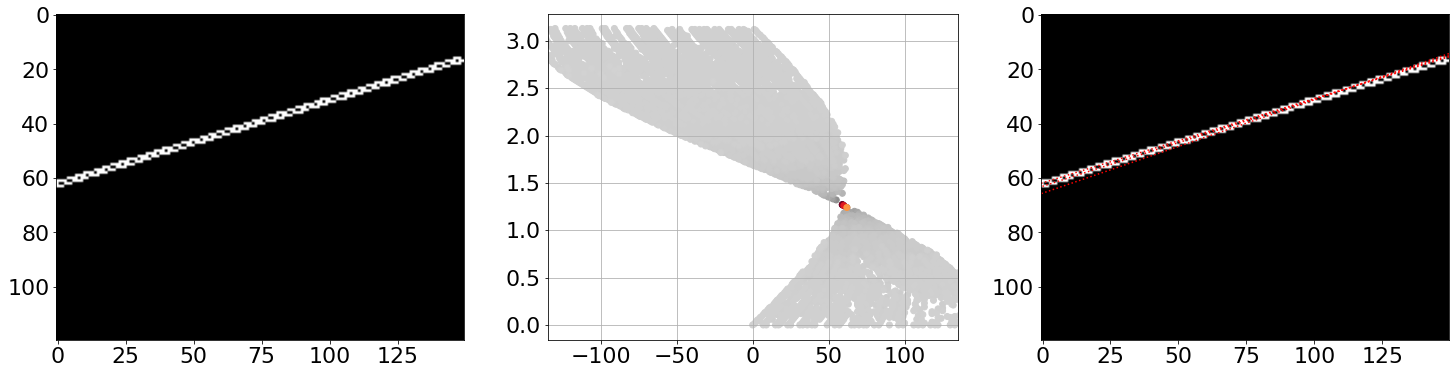

[[[ 59.          1.23      113.       ]]

 [[ 60.          1.2099999 109.       ]]

 [[ 59.          1.28      108.       ]]

 ...

 [[ -9.          3.12        2.       ]]

 [[ -6.          3.12        2.       ]]

 [[ -3.          3.12        2.       ]]]
(-0.5, 149.5)
0.9424888083067761 0.3342377091479552 -59.0
0.9356159729368123 0.35301947706252995 -60.0
0.9580158520862366 0.28671523704100893 -59.0
0.9520903386740184 0.30581691745813033 -60.0
0.9608350536347495 0.2771209117095063 -58.0
0.9320390600493778 0.36235782114130294 -61.0


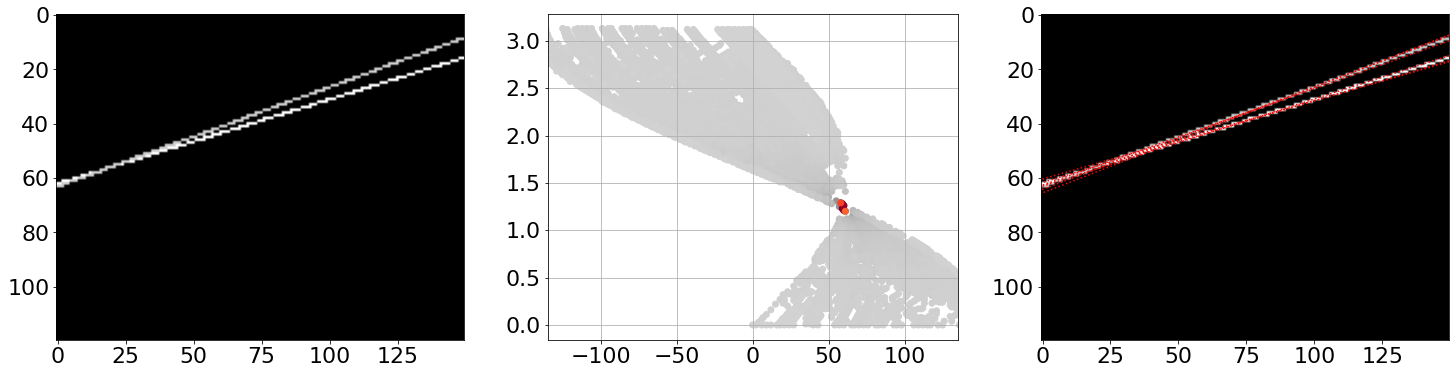

In [25]:
font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)
for l in test_edges:
    naive_hough(l)